In [1]:
from dgp import dgp
from kernel_class import kernel, combine
from synthetic import path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

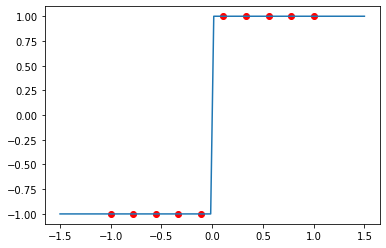

In [2]:
n=10
X=np.linspace(-1,1,n)[:,None]
f= lambda x: -1. if x<0 else 1.
Y=np.array([f(x) for x in X]).reshape(-1,1)
Xt=np.linspace(-1.5,1.5,100)[:,None]
Yt=np.array([f(x) for x in Xt]).reshape(-1,1)
plt.plot(Xt,Yt)
plt.scatter(X,Y,color='r')

In [6]:
ker1=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='matern2.5',zero_mean=1)
ker2=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='matern2.5',zero_mean=1)
ker3=kernel(length=np.array([1]),scale=1,nugget=1e-6,name='matern2.5',zero_mean=1,scale_est=1)
ker_all=combine(ker1,ker2,ker3)
m=dgp(X,Y,ker_all)

In [5]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=300, burnin=1,method='mean_var')

se = 0.011741156920290192, ess = 67.63710902867388


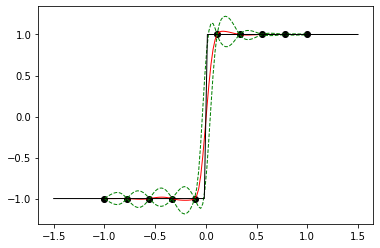

In [5]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

In [7]:
m.train(N=200,burnin=100,method='L-BFGS-B')

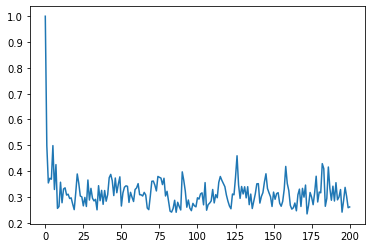

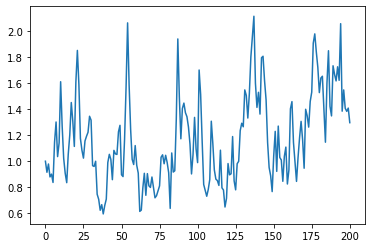

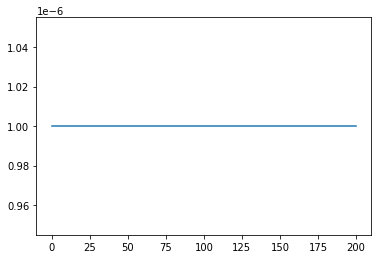

In [13]:
m.plot(2)

In [15]:
z=np.linspace(-1,1,100)[:,None].reshape(-1,1)
mu,var=m.predict(z, N=300, burnin=0,method='mean_var')

se = 0.010081899009709063, ess = 87.9868585095674


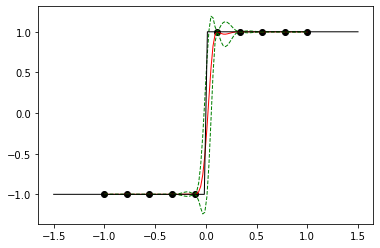

In [16]:
s=np.sqrt(var)
u=mu+2*s
l=mu-2*s
p=plt.plot(z,mu,color='r',alpha=1,lw=1)
p1=plt.plot(z,u,'--',color='g',lw=1)
p1=plt.plot(z,l,'--',color='g',lw=1)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

In [9]:
sample=m.predict(z, N=0, burnin=1,method='sampling')

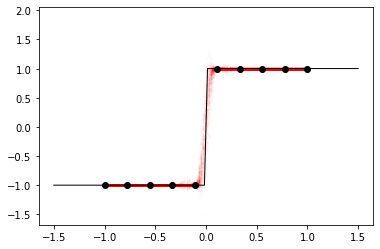

In [10]:
fig = plt.figure()
ax = fig.gca()
for i in range(len(sample)):
    surf = ax.scatter(z.flatten(),sample[i,],s=2,color='r',alpha=0.01)
plt.plot(Xt,Yt,color='black',lw=1)
plt.scatter(X,Y,color='black')

In [ ]:
m.